# Lecture 5, 10.11.2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from math import *
from scipy.integrate import odeint

In [2]:
# Interactive Widgets
import ipywidgets as widgets
from IPython.display import HTML
from ipywidgets import interact, IntSlider, FloatSlider, Layout

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

## FritzhughNagumo-Model

In [3]:
def nagumo(x, t, a, b, e, I):
    #x[0] is u         - membrane voltage
    #x[1] is w         - recovery variable 
    # dx1dt is u_dot  - change of membrane voltage over time
    # dx2dt is w_dot  - change of recovery
    
    #t is time
    #a is a
    #b is b           - threshold value
    #e is epsilon
    #I is I            - external injection current
    
    dx1dt = a*x[0]*(x[0]-b)*(1-x[0])-x[1]+I
    dx2dt = e*(x[0]-x[1])
    #print(dx2dt)
    return [dx1dt, dx2dt]

In [4]:
def plot_nullclines(a, b, I, e):
    # u nullcline
    u = np.linspace(-1, 2, 100)
    w = a*u*(u-b)*(1-u)+I
    plt.plot(u, w)
    # w nullcline
    w = np.linspace(-1, 1)
    u = w
    plt.plot(u, w)
    
#plot_nullclines (a,b,I,e)
    

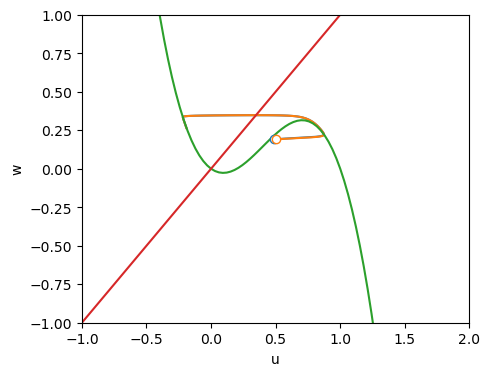

In [5]:
%matplotlib inline    
    
nagumo_fig = plt.figure(figsize=(5,4))
    
plt.xlim(-1, 2)
plt.ylim(-1, 1)
plt.xlabel('u')
plt.ylabel('w')
a=3 
b=0.2 
I=0 
e=0.01
u0=0+0.49
w0=0+0.19
Tmax=50
x0 = [0 + u0 ,0 + w0]

#
u0_1=u0+0.01
w0_1=w0
x0_1 = [0 + u0_1 ,0 + w0_1]

ts = np.linspace(0,Tmax,round(Tmax*10))

traj = odeint(lambda x, t: nagumo(x,t,a,b,e,I), x0, ts)
lh = plt.plot(traj[:,0], traj[:,1])

traj_1 = odeint(lambda x, t: nagumo(x,t,a,b,e,I), x0_1, ts)
lh_1 = plt.plot(traj_1[:,0], traj_1[:,1])


plt.figure(nagumo_fig)
plot_nullclines (a,b,I,e)
plt.plot(*x0, 'bo', markeredgecolor = lh[0].get_color(), markerfacecolor = 'w') #starting point x0
plt.plot(*x0_1, 'bo', markeredgecolor = lh_1[0].get_color(), markerfacecolor = 'w') #starting point x0


    

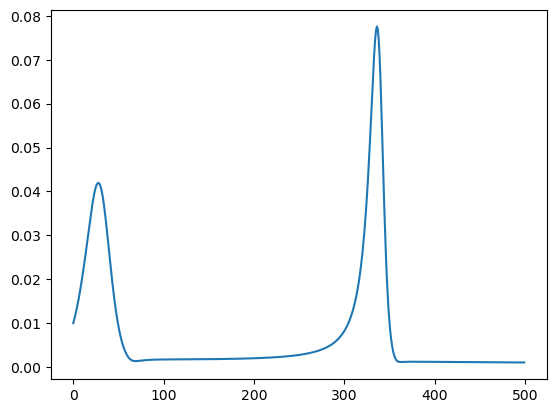

In [6]:

#plt.plot(x, q)
#plt.grid()
###
u_A = traj[:,0]
w_A = traj[:,1]
#plt.plot(u_A, w_A) 
u_B = traj_1[:,0]
w_B = traj_1[:,1]
#plt.plot(u_B, w_B)

plt.plot(((u_A-u_B)**2+(w_A-w_B)**2)**(1/2))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


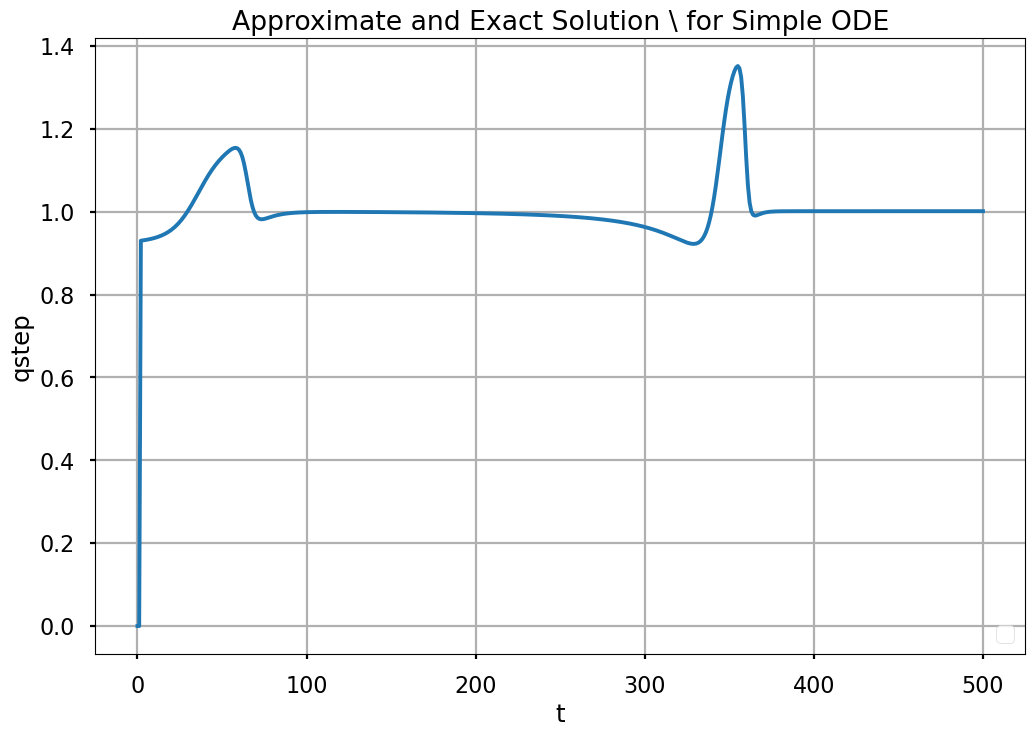

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters

#f = lambda t, s: np.exp(-t) # ODE
f= lambda t,x: np.array(nagumo(x,t,a,b,e,I))

def stepsize(q0,q1):
    qst=q1/q0
    return[qst]

h = 0.1 # Step size
TimeOverAll = 50

t = np.arange(0, TimeOverAll + h, h) # Numerical grid
s0 = [u0,w0] # Initial Condition
s0_1 = [u0_1,w0_1] #second trajectory

# Explicit Euler Method

s = np.zeros((len(t),2)) #traj of unpur state
s_1 = np.zeros((len(t),2)) #traj of purstate
q = np.zeros(len(t))  #Euclidean both traj
qstep = np.zeros(len(t)) #Increasement of last step's Euclidean

s[0] = s0
s_1[0] = s0_1


for i in range(0, len(t) - 1):
    #print(f(t[i],s[i]))
    s[i + 1] = s[i] + h*f(t[i], s[i])
    s_1[i + 1] = s_1[i] + h*f(t[i], s_1[i])
    q[i+1] = np.linalg.norm(s[i+1] - s_1[i+1])
    #qstep[i+1] = stepsize(q[i],q[i+1])
    qstep[i+1] = q[i]/q[i+1]
    

    
plt.figure(figsize = (12, 8))


#plt.plot(s[:,0], s[:,1], label='unpur')
#plt.plot(s_1[:,0], s_1[:,1], label='pur')

#plt.plot( traj[:,0],traj[:,1] , 'bo--', label='ODEInt')
#plt.plot(traj_1[:,0],traj_1[:,1], 'g', label='ODEint')
#plt.xlabel('u')
#plt.ylabel('w')

plt.xlabel('t')
plt.ylabel('qstep')
plt.plot(qstep)
plt.title('Approximate and Exact Solution \ for Simple ODE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [8]:
print(s)

[[ 0.49        0.19      ]
 [ 0.4927413   0.1903    ]
 [ 0.49566227  0.19060244]
 ...
 [-0.1921855   0.26758314]
 [-0.19198646  0.26712337]
 [-0.19178752  0.26666426]]


interactive(children=(FloatSlider(value=3.0, continuous_update=False, description='a', layout=Layout(width='99…

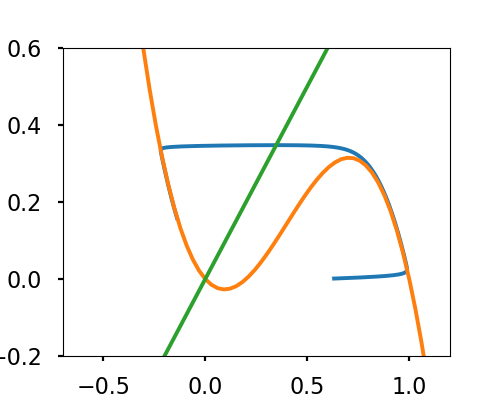

In [9]:
%matplotlib widget
plt.close("all")
nagumo_fig = plt.figure(figsize=(5,4))

def nagumo_interactive(a = 3, b = 0.2, I = 0 , e = 0.01 , Tmax = 20, init_u=0.02, init_w =0):
    plt.figure(nagumo_fig)
    plt.clf()
    ts = np.linspace(0,Tmax,round(Tmax*10))
    #x0 = [1, b/a + init] #from brusselator-makes sense here?
    x0 = [0 + init_u ,0 + init_w]
    traj = odeint(lambda x, t: nagumo(x,t,a,b,e,I), x0, ts)
    lh = plt.plot(traj[:,0], traj[:,1])
    
    ##########
    #this is where the nullcline of u_dot should be
    #ncu = np.linspace(0,11,11)
    #plt.plot(ncu)
    
    
    plot_nullclines (a,b,I,e)
    ###########
    
    #plt.arrow(traj[0,0], traj[0,1], traj[1,0]-traj[0,0], traj[1,1]-traj[0,1], shape='full', color=lh[0].get_color(), lw=0, length_includes_head=True, head_width=.12)
    plt.plot(*x0, 'bo', markeredgecolor = lh[0].get_color(), markerfacecolor = 'w') #starting point x0
    #plt.plot(1, b/a, 'ko')   #bruss
    #plt.xlim(0.25,2)        #bruss
    #plt.ylim(b/a-2,2+b/a)   #bruss
    plt.xlim(-0.7,1.2)#(-60,60)#(-0.7,1.2)
    plt.ylim(-0.2,0.6)#(-60,60)#(-1,2)#(-0.2,0.6)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')    
    
interact(nagumo_interactive,
         
         a = FloatSlider(min=0, max=5, step=0.01, value=3, continuous_update=False, description='a', style=style, layout=slider_layout),
         b = FloatSlider(min=0, max=2, step=0.01, value=0.2, continuous_update=False, description='b', style=style, layout=slider_layout),
         e = FloatSlider(min=0, max=0.1, step=0.0001, value=0.01, continuous_update=False, description='e', style=style, layout=slider_layout),
         I = FloatSlider(min=-1, max=1, step=0.1, value=0, continuous_update=False, description='I', style=style, layout=slider_layout),
         Tmax = FloatSlider(min=10, max=500, step=10, value=100, continuous_update=False, description='Tmax', style=style, layout=slider_layout),
         init_u = FloatSlider(min=-1.0, max=1.0, step=0.01, value=0.58, continuous_update=False, description='u0', style=style, layout=slider_layout),
         init_w = FloatSlider(min=-1.0, max=1.0, step=0.02, value=0, continuous_update=False, description='w0', style=style, layout=slider_layout),
        
         #bruss
         #a = FloatSlider(min=0, max=5, step=0.01, value=1, continuous_update=False, description='a', style=style, layout=slider_layout),
         #b = FloatSlider(min=0, max=2, step=0.01, value=1.5, continuous_update=False, description='b', style=style, layout=slider_layout),        
         #Tmax = FloatSlider(min=10, max=500, step=10, value=20, continuous_update=False, description='Tmax', style=style, layout=slider_layout),
         #init = FloatSlider(min=0.0, max=2.0, step=0.02, value=0.5, continuous_update=False, description='init', style=style, layout=slider_layout),
        
        );



In [10]:
#%matplotlib inline    
    
plt.xlim(-1, 2)
plt.ylim(-1, 1)
plt.xlabel('u')
plt.ylabel('w')
a=3 
b=0.2 
I=0 
e=0
plt.figure(nagumo_fig)
plot_nullclines (a,b,I,e)